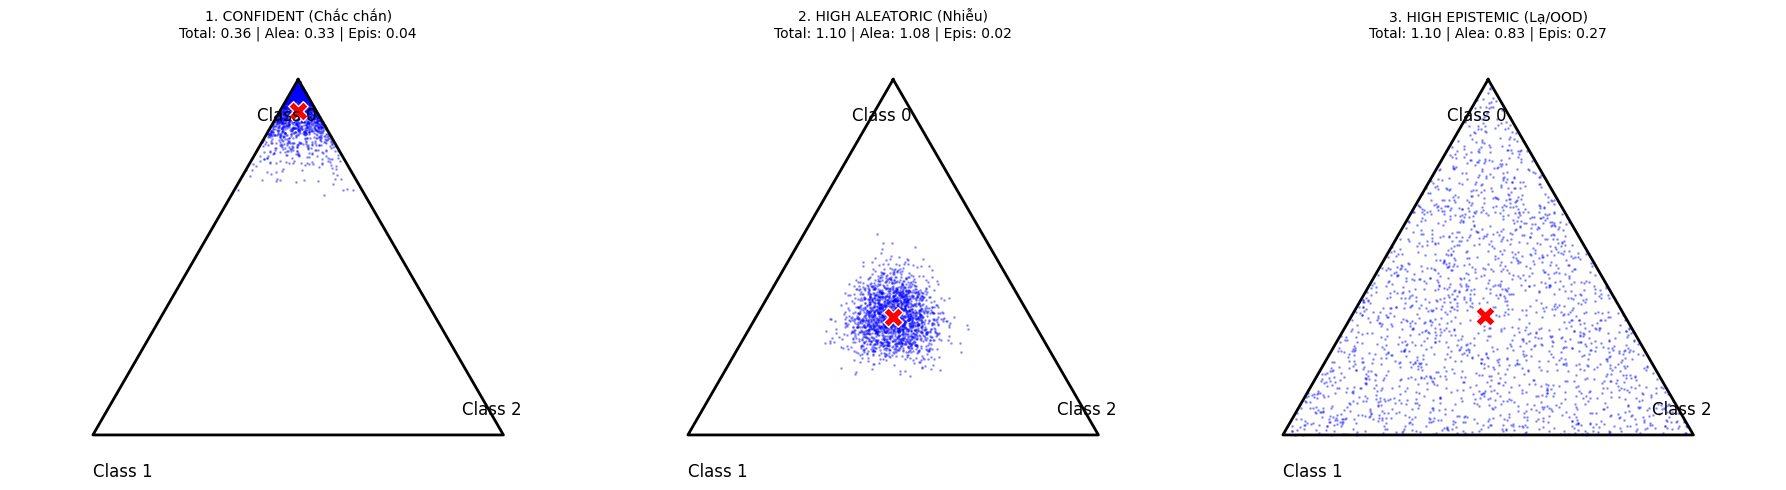

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def plot_dirichlet_simplex(alphas, ax, title):
    # Tạo mẫu dữ liệu từ phân phối Dirichlet
    # Lấy 2000 điểm để tạo thành "đám mây"
    samples = stats.dirichlet.rvs(alphas, size=2000)

    # Tính Mean (Trọng tâm đám mây) - Dùng cho Total Uncertainty
    mean_p = np.mean(samples, axis=0)

    # Chuyển đổi toạ độ Barycentric (3 chiều) sang Cartesian (2 chiều để vẽ)
    # p = [p0, p1, p2] -> x, y
    # Class 0: (0, 0), Class 1: (1, 0), Class 2: (0.5, sqrt(3)/2)
    def to_cartesian(p):
        return p[:, 1] + 0.5 * p[:, 2], (np.sqrt(3) / 2) * p[:, 2]

    x, y = to_cartesian(samples)
    mean_x, mean_y = to_cartesian(mean_p.reshape(1, -1))

    # Vẽ đám mây điểm
    ax.scatter(x, y, s=1, alpha=0.3, color='blue', label='Các vector p có thể xảy ra')

    # Vẽ trọng tâm (Mean)
    ax.scatter(mean_x, mean_y, s=200, color='red', marker='X', edgecolors='white', label='Trọng tâm (Mean p)')

    # Vẽ khung tam giác
    corners = np.array([[0, 0, 1], [1, 0, 0], [0, 1, 0]]) # Thứ tự vẽ: C0 -> C1 -> C2 -> C0
    cx, cy = to_cartesian(corners)
    # Nối lại thành tam giác
    triangle_x = [cx[0], cx[1], cx[2], cx[0]]
    triangle_y = [cy[0], cy[1], cy[2], cy[0]]
    ax.plot(triangle_x, triangle_y, 'k-', linewidth=2)

    # Label các đỉnh
    ax.text(cx[0]-0.1, cy[0]-0.1, "Class 0", fontsize=12)
    ax.text(cx[1], cy[1]-0.1, "Class 1", fontsize=12)
    ax.text(cx[2]-0.1, cy[2]+0.05, "Class 2", fontsize=12)

    # Tính toán các chỉ số Uncertainty để hiển thị
    # 1. Total: Entropy của Mean
    total_unc = -np.sum(mean_p * np.log(mean_p + 1e-7))

    # 2. Aleatoric: Trung bình của các Entropy
    entropies = -np.sum(samples * np.log(samples + 1e-7), axis=1)
    aleatoric_unc = np.mean(entropies)

    # 3. Epistemic
    epistemic_unc = total_unc - aleatoric_unc

    ax.set_title(f"{title}\nTotal: {total_unc:.2f} | Alea: {aleatoric_unc:.2f} | Epis: {epistemic_unc:.2f}", fontsize=10)
    ax.axis('off')
    ax.axis('equal')

# --- VẼ 3 TRƯỜNG HỢP ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Case 1: Tự tin (High Evidence cho Class 2)
# Đám mây co cụm ở đỉnh
plot_dirichlet_simplex([1, 1, 20], axes[0], "1. CONFIDENT (Chắc chắn)")

# Case 2: Nhiễu dữ liệu (High Aleatoric)
# Đám mây co cụm ở GIỮA (Vì dữ liệu mâu thuẫn mạnh 10-10-10)
plot_dirichlet_simplex([20, 20, 20], axes[1], "2. HIGH ALEATORIC (Nhiễu)")

# Case 3: Thiếu kiến thức (High Epistemic)
# Đám mây TỎA RA KHẮP NƠI (Vì alpha nhỏ 1-1-1)
plot_dirichlet_simplex([1, 1, 1], axes[2], "3. HIGH EPISTEMIC (Lạ/OOD)")

plt.tight_layout()
plt.show()